In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [27]:
df = pd.read_csv('IMDB Dataset.csv')

In [28]:
df.shape

(50000, 2)

In [29]:
df.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [30]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

* clean
* lower()
* lema or ..
* stopword


In [31]:
def simple_transformer(column):
    """
    This transformer will convert any giving categoricol column to numerical
    
    """
    # all unique values for column 
    names = column.value_counts().index
    # how size of them
    size = len(names)
    # create dict value:name / ex: {1:'Focus'}... 
    replacement = dict(zip(names, range(size)))
    # aplly the changes
    column.replace(replacement, inplace=True)
    return replacement

In [32]:
simple_transformer(df.sentiment)

{'positive': 0, 'negative': 1}

In [33]:
X = df.review
y = df.sentiment

In [34]:
X[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import nltk
import re
from nltk.corpus import stopwords

In [36]:
## stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vedantsmac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Lemmatization

In [37]:
from nltk.stem import WordNetLemmatizer

In [39]:
import nltk
nltk.download('wordnet')
sents = df.review.copy()
### Dataset Preprocessing
wnl = WordNetLemmatizer()

corpus = []
for sent in sents:
    review = re.sub('[^a-zA-Z]', ' ', sent).lower().split()
    review = [wnl.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# # a denotes adjective in "pos"
# print("better :", wnl.lemmatize("better", pos ="a"))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vedantsmac/nltk_data...


In [40]:
corpus[0]

'one reviewer mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away br br would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experi

In [41]:
### Vocabulary size
voc_size = 10000
onehot_repr = [one_hot(sent,voc_size) for sent in corpus] 
print(onehot_repr[0])

[946, 9661, 6968, 9480, 655, 4468, 9303, 6022, 3253, 8257, 5612, 5612, 1032, 6199, 8115, 655, 4244, 5664, 5806, 1980, 4954, 6022, 2142, 6456, 2075, 6404, 4697, 1691, 2236, 6404, 182, 4932, 2861, 5520, 5090, 1980, 5139, 2001, 6179, 2142, 5612, 5612, 8194, 655, 6908, 3677, 3209, 6674, 2110, 8848, 9332, 4042, 9058, 4827, 6179, 7883, 7785, 5835, 4033, 2242, 3449, 7586, 5798, 3566, 2664, 9924, 7711, 6179, 5587, 498, 5464, 3821, 1377, 6073, 539, 6844, 4100, 2408, 8835, 9745, 9072, 7088, 2178, 5200, 3360, 7423, 6710, 5612, 5612, 1102, 7535, 8241, 4073, 6404, 5532, 2426, 6456, 6404, 4178, 6022, 4626, 6159, 4139, 4332, 3549, 6022, 3155, 6022, 2648, 655, 5265, 2009, 1032, 4468, 8014, 5171, 8115, 3916, 1946, 7535, 9037, 9284, 4516, 6510, 655, 7783, 1115, 2664, 6329, 7062, 1980, 1980, 4598, 6670, 8972, 6092, 5210, 8017, 6952, 7919, 7603, 6710, 6747, 3032, 5851, 9165, 8017, 4148, 5835, 4617, 5532, 808, 6865, 9289, 5835, 63, 9480, 655, 3534, 2508, 6555, 1099, 942, 3286, 7603, 3598, 5732, 980]


In [42]:
sent_length = 200
embedded_docs = pad_sequences(onehot_repr, padding='post', maxlen=sent_length)
embedded_docs[0]

array([ 946, 9661, 6968, 9480,  655, 4468, 9303, 6022, 3253, 8257, 5612,
       5612, 1032, 6199, 8115,  655, 4244, 5664, 5806, 1980, 4954, 6022,
       2142, 6456, 2075, 6404, 4697, 1691, 2236, 6404,  182, 4932, 2861,
       5520, 5090, 1980, 5139, 2001, 6179, 2142, 5612, 5612, 8194,  655,
       6908, 3677, 3209, 6674, 2110, 8848, 9332, 4042, 9058, 4827, 6179,
       7883, 7785, 5835, 4033, 2242, 3449, 7586, 5798, 3566, 2664, 9924,
       7711, 6179, 5587,  498, 5464, 3821, 1377, 6073,  539, 6844, 4100,
       2408, 8835, 9745, 9072, 7088, 2178, 5200, 3360, 7423, 6710, 5612,
       5612, 1102, 7535, 8241, 4073, 6404, 5532, 2426, 6456, 6404, 4178,
       6022, 4626, 6159, 4139, 4332, 3549, 6022, 3155, 6022, 2648,  655,
       5265, 2009, 1032, 4468, 8014, 5171, 8115, 3916, 1946, 7535, 9037,
       9284, 4516, 6510,  655, 7783, 1115, 2664, 6329, 7062, 1980, 1980,
       4598, 6670, 8972, 6092, 5210, 8017, 6952, 7919, 7603, 6710, 6747,
       3032, 5851, 9165, 8017, 4148, 5835, 4617, 55

In [43]:
import numpy as np
X = np.array(embedded_docs)
y = np.array(df.sentiment)

In [44]:
X.shape, y.shape

((50000, 200), (50000,))

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=33, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=33, stratify=y_train)

In [46]:
## Creating model
embedding_vector_features = 50
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length = sent_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           500000    
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 560,501
Trainable params: 560,501
Non-trainable params: 0
_________________________________________________________________


In [47]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32);

Epoch 1/10


2024-04-23 07:04:08.667045: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1000/1000 [==============================] - 79s 79ms/step - loss: 0.6871 - accuracy: 0.5290 - val_loss: 0.6527 - val_accuracy: 0.6302
Epoch 2/10
1000/1000 [==============================] - 76s 76ms/step - loss: 0.6493 - accuracy: 0.5922 - val_loss: 0.6846 - val_accuracy: 0.5232
Epoch 3/10
1000/1000 [==============================] - 74s 74ms/step - loss: 0.6578 - accuracy: 0.5713 - val_loss: 0.6822 - val_accuracy: 0.5194
Epoch 4/10
1000/1000 [==============================] - 75s 75ms/step - loss: 0.6617 - accuracy: 0.5718 - val_loss: 0.6900 - val_accuracy: 0.5265
Epoch 5/10
1000/1000 [==============================] - 78s 78ms/step - loss: 0.6617 - accuracy: 0.5474 - val_loss: 0.6845 - val_accuracy: 0.5309
Epoch 6/10
1000/1000 [==============================] - 75s 75ms/step - loss: 0.6516 - accuracy: 0.5566 - val_loss: 0.6863 - val_accuracy: 0.5356
Epoch 7/10
1000/1000 [==============================] - 74s 74ms/step - loss: 0.5352 - accuracy: 0.6982 - val_loss: 0.3922 - val_accura

## Accuracy

In [48]:
model.evaluate(X_val, y_val)

313/313 [==============================] - 6s 19ms/step - loss: 0.4205 - accuracy: 0.8583


[0.42045924067497253, 0.858299970626831]

## Accuracy evaluation

In [49]:
import matplotlib.pyplot as plt

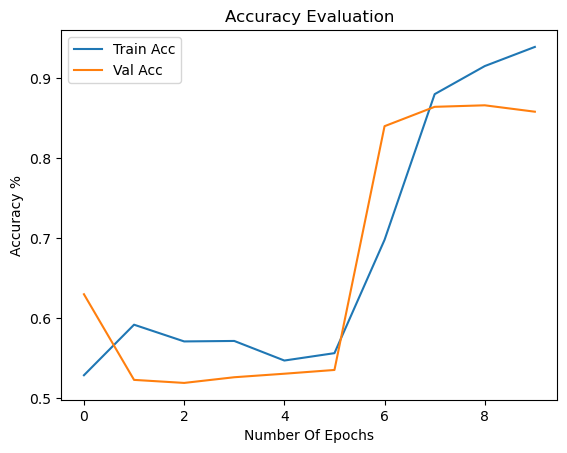

In [50]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Number Of Epochs')
plt.ylabel('Accuracy %')
plt.title('Accuracy Evaluation')
plt.legend()
plt.show()

## Loss history evaluation

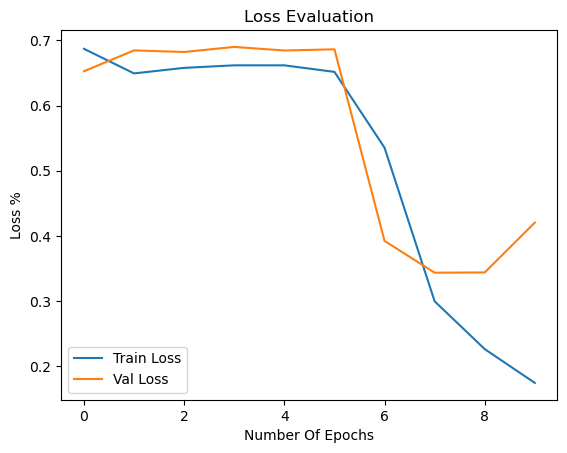

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Evaluation')
plt.ylabel('Loss %')
plt.xlabel('Number Of Epochs')
plt.legend(['Train Loss', 'Val Loss'], loc='lower left')
plt.show()

## Test Data

In [52]:
model.evaluate(X_test, y_test)

250/250 [==============================] - 5s 18ms/step - loss: 0.4149 - accuracy: 0.8587


[0.4148724675178528, 0.8587499856948853]

In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

250/250 [==============================] - 5s 18ms/step


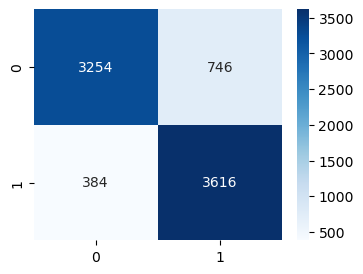

In [54]:
y_pred = model.predict(X_test)
y_pred = [1 if x>.5 else 0 for x in y_pred]
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues');